# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### 1. Load the dataset

In [41]:
# Load files into a pandas dataframe
df = pd.read_csv('data/data_bank_account.csv')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [42]:
# inspect train data
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [43]:
# Check for missing values
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



In [44]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

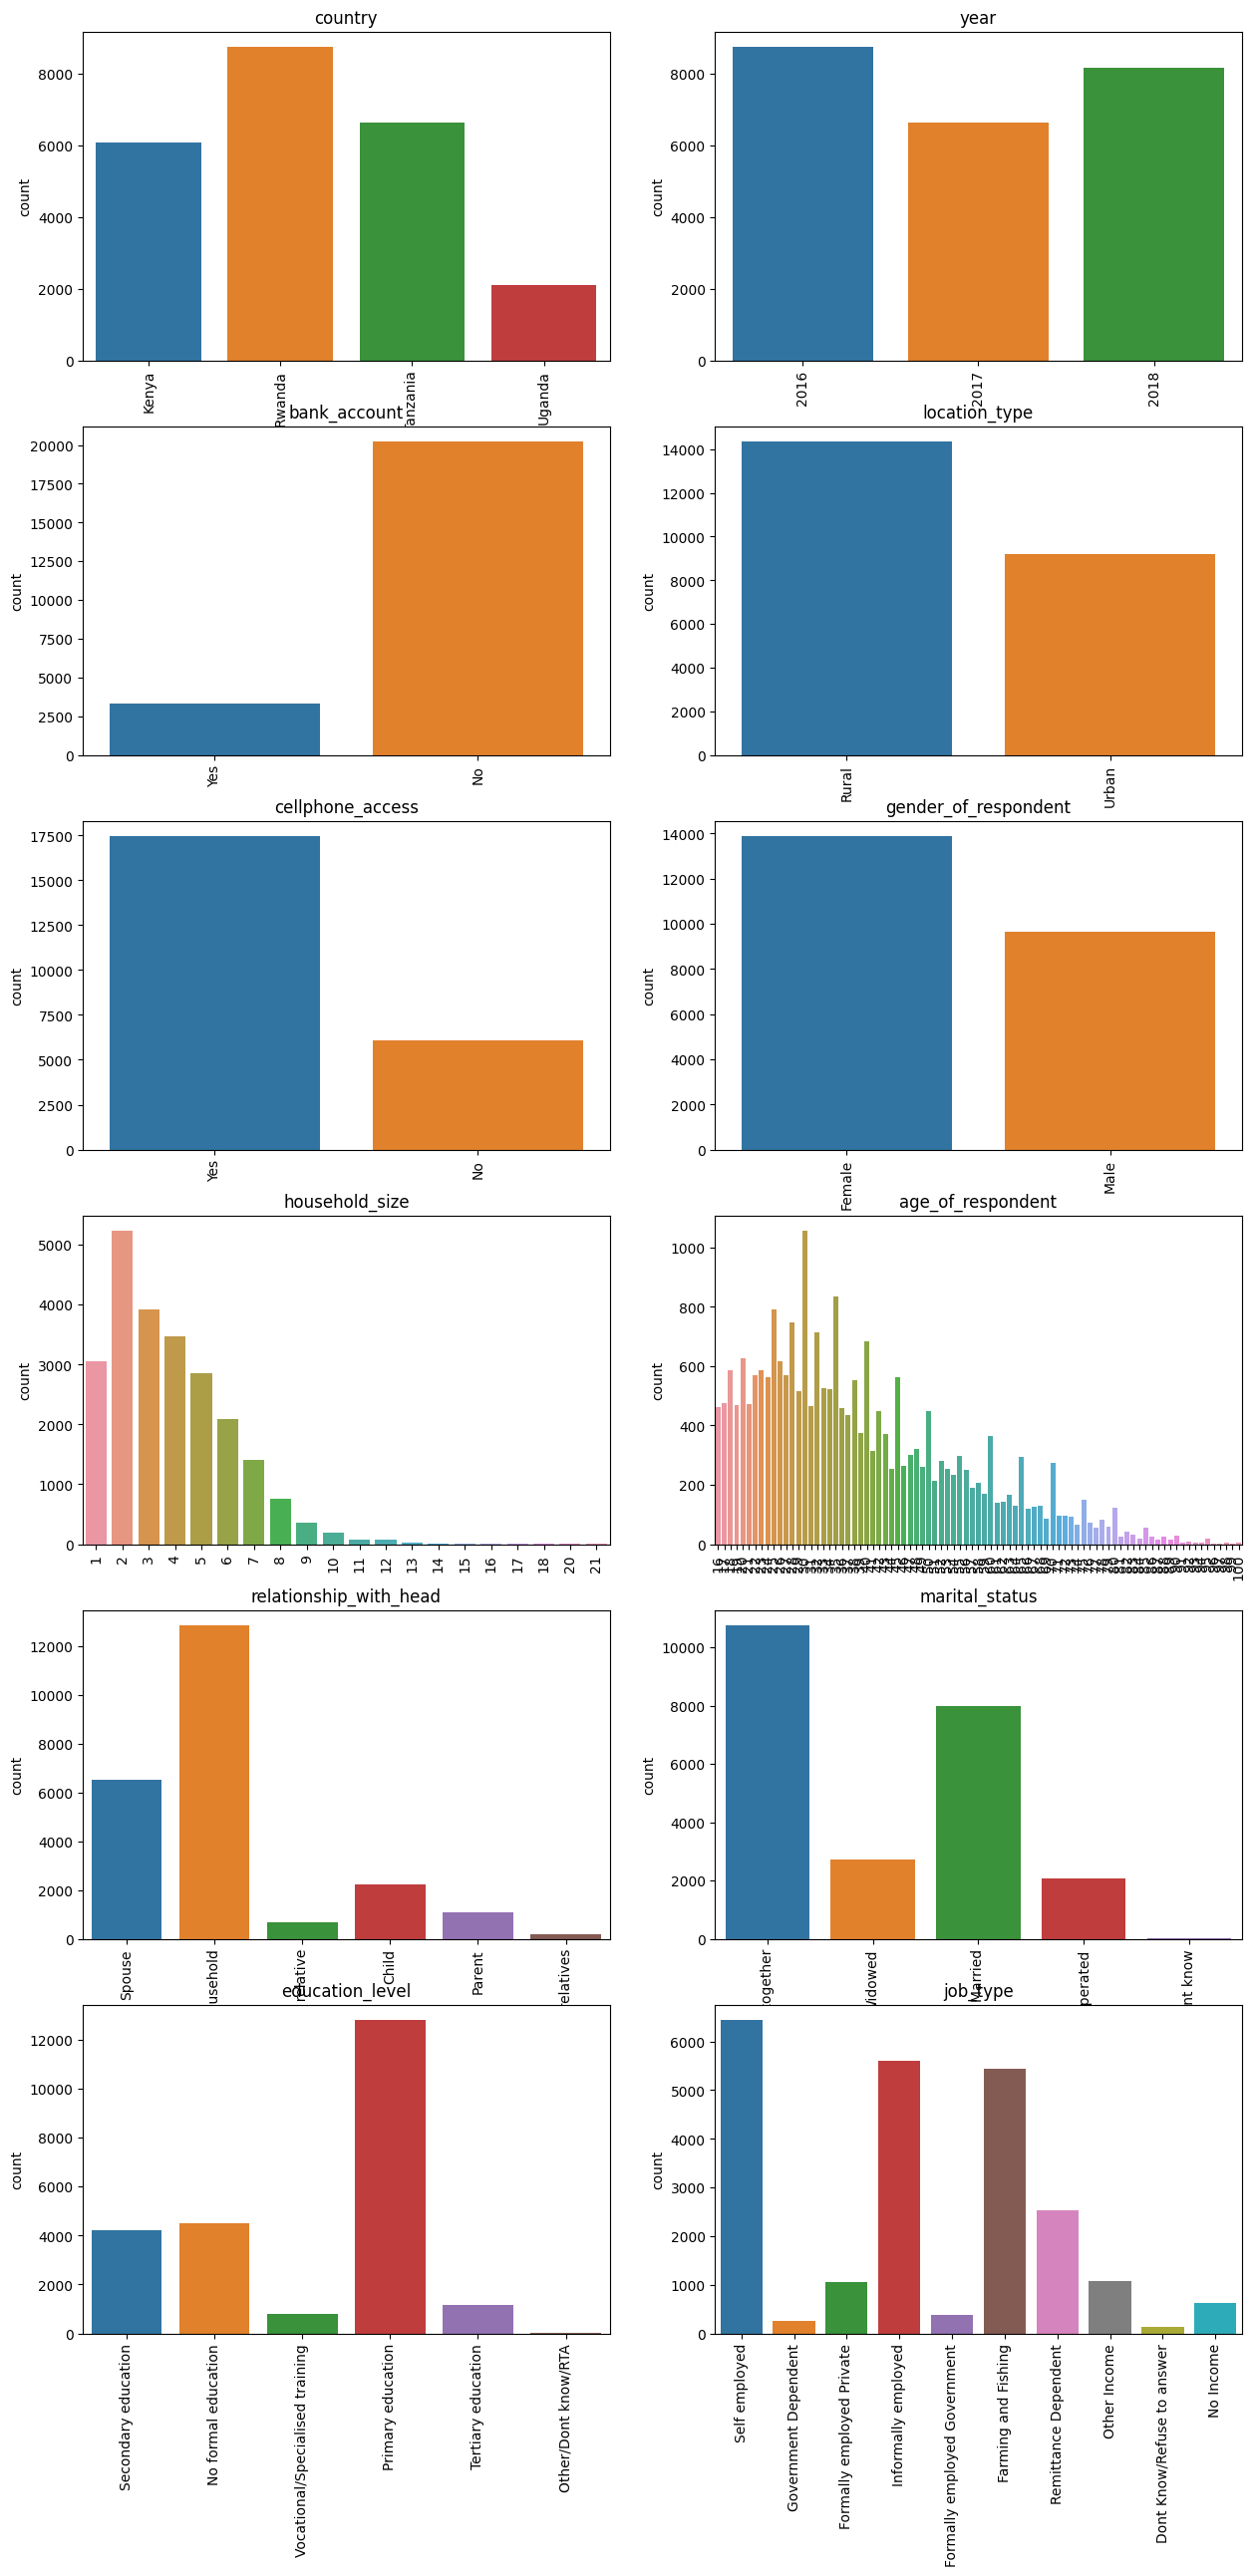

In [45]:
selected_columns = ['country', 'year', 
                    'bank_account', 'location_type',
                    'cellphone_access', 'gender_of_respondent', 
                    'household_size', 'age_of_respondent',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type']
fig,ax = plt.subplots(6,2,figsize=(15,30))
count = 0
for item in selected_columns:
    sns.countplot(data=df, x=item, ax=ax[int(count/2)][count%2]).set(title=item, xlabel='')
    count += 1

for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)



In [46]:
df.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [47]:
df.country.value_counts(normalize=True)

country
Rwanda      0.371323
Tanzania    0.281415
Kenya       0.257949
Uganda      0.089313
Name: proportion, dtype: float64

In [48]:
df.country.value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

Splitted into bank account yes/no

<Figure size 640x480 with 0 Axes>

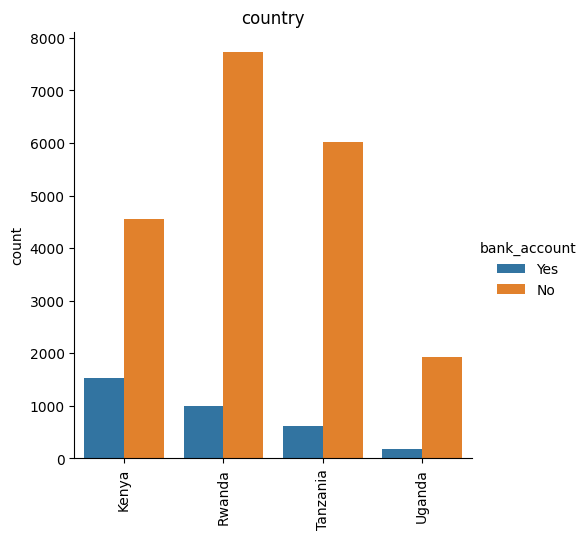

<Figure size 640x480 with 0 Axes>

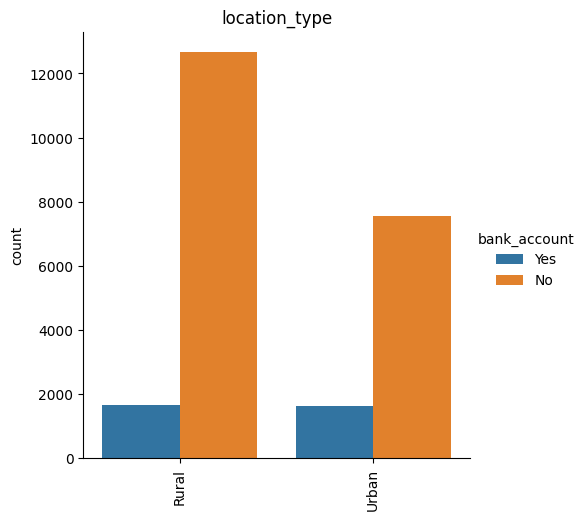

<Figure size 640x480 with 0 Axes>

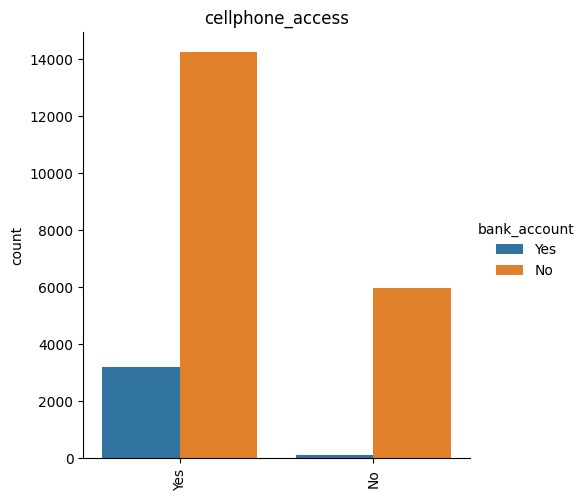

<Figure size 640x480 with 0 Axes>

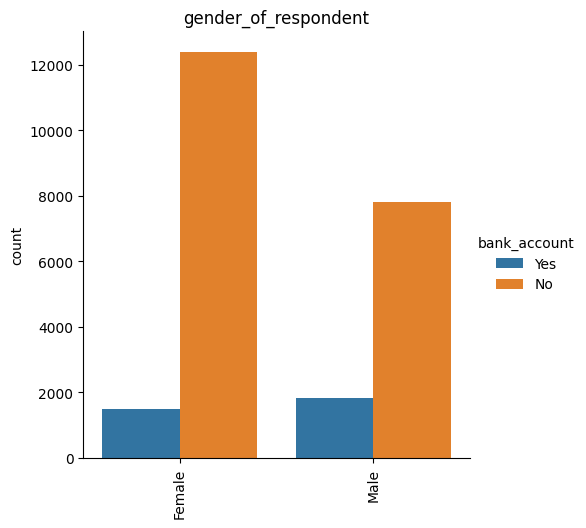

<Figure size 640x480 with 0 Axes>

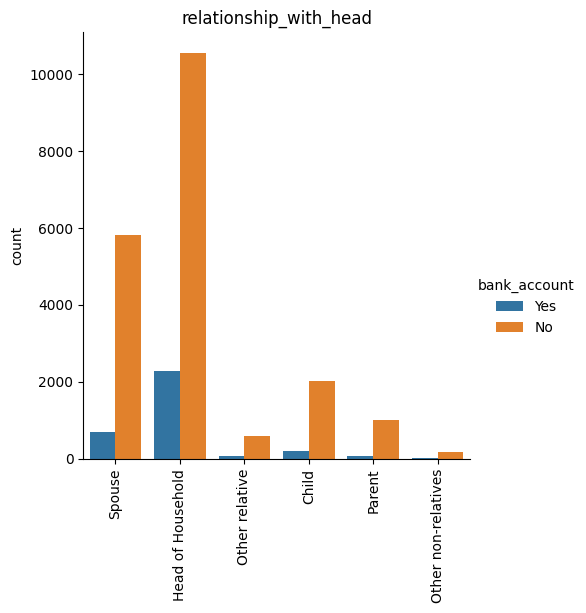

<Figure size 640x480 with 0 Axes>

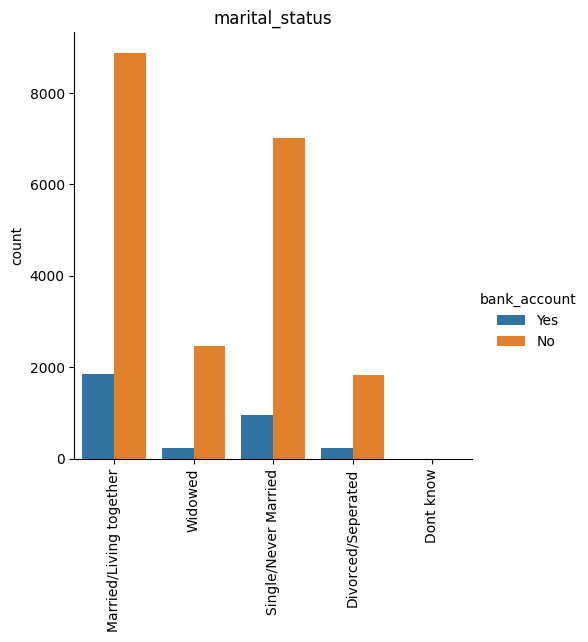

<Figure size 640x480 with 0 Axes>

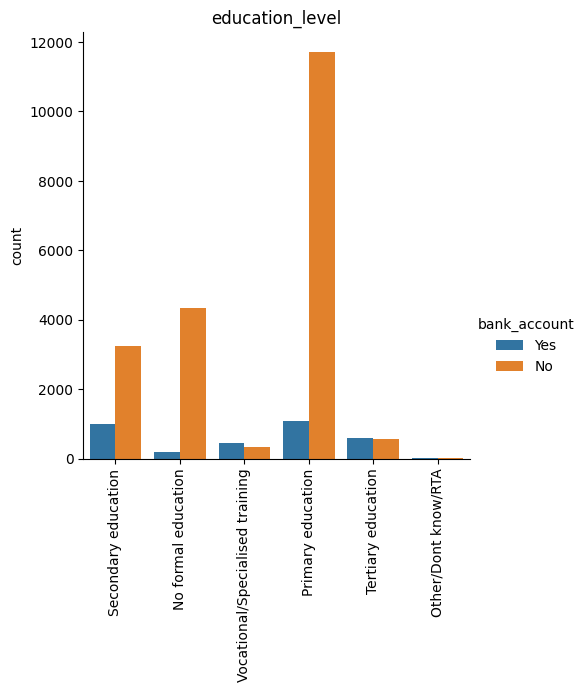

<Figure size 640x480 with 0 Axes>

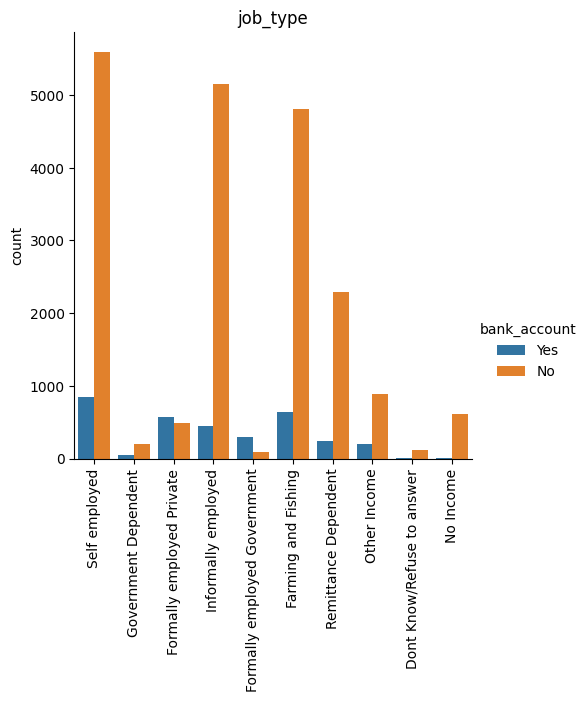

<Figure size 640x480 with 0 Axes>

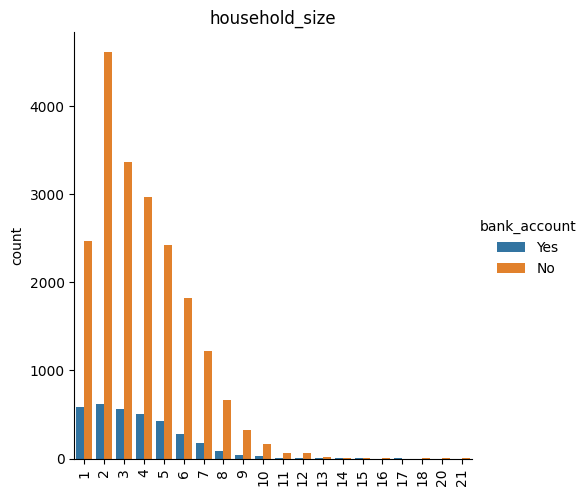

<Figure size 640x480 with 0 Axes>

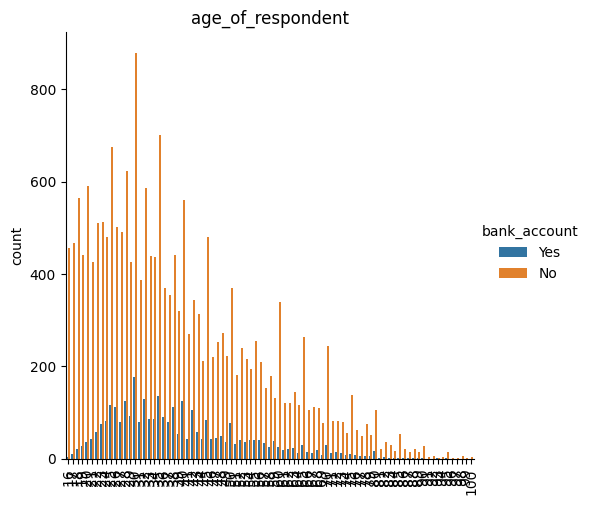

In [49]:
selected_columns = ['country', 'location_type',
                    'cellphone_access', 'gender_of_respondent', 
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type',
                    'household_size','age_of_respondent']
count = 0
for item in selected_columns:
    plt.figure()
    g=sns.catplot(data=df, x=item, hue = 'bank_account', kind='count').set(xlabel='', title = item)
    ax = g.facet_axis(0,0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show();
    count += 1


How much people per country? 

In [184]:
# Load files into a pandas dataframe
country_data = pd.read_csv('data/country_data.csv')
country_data.columns = country_data.columns.str.replace(' ','_')
country_data.columns = country_data.columns.str.lower()

In [185]:
country_data

,country,year,population,gdp_in_billion
0,Kenya,2018,49950000,78
1,Rwanda,2016,11930000,8
2,Tanzania,2017,56270000,47
3,Uganda,2018,41520000,28


Split the data into countries

In [50]:
df.groupby('country').bank_account.value_counts()

country   bank_account
Kenya     No              4547
          Yes             1521
Rwanda    No              7732
          Yes             1003
Tanzania  No              6013
          Yes              607
Uganda    No              1920
          Yes              181
Name: count, dtype: int64

In [52]:
country_list = df.country.unique().tolist()
country_list

['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

In [53]:
#test
df.query('country == "Kenya"').bank_account.value_counts(normalize=True)

bank_account
No     0.749341
Yes    0.250659
Name: proportion, dtype: float64

Bank Account Yes/No Pie Chart

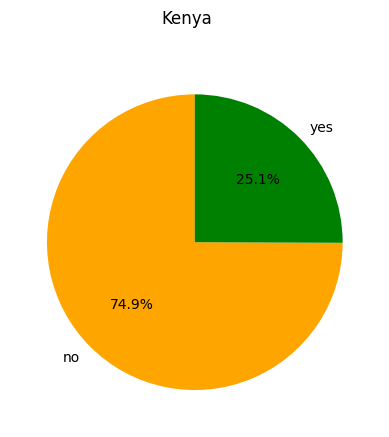

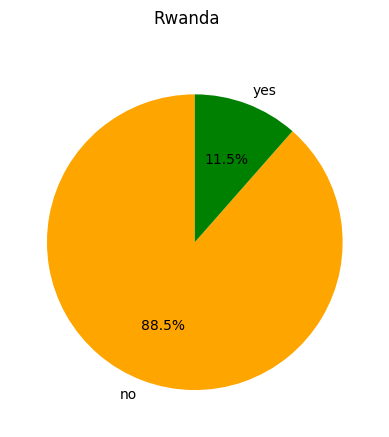

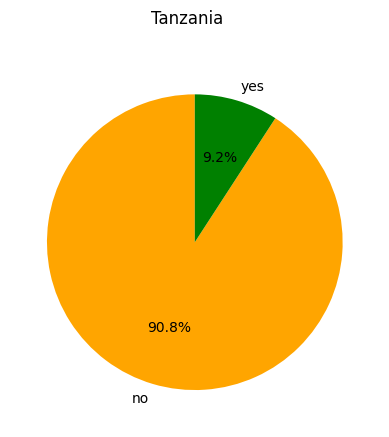

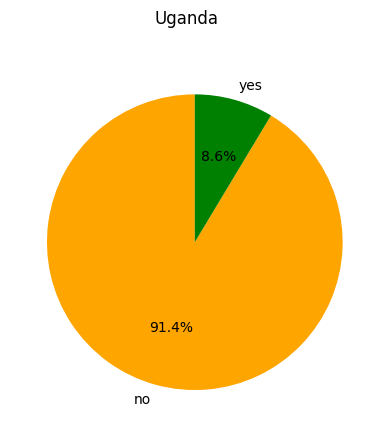

In [54]:
colors = sns.color_palette('tab10')
for countr in country_list:
        plt.pie(df.query('country == @countr').bank_account.value_counts(normalize=True),
                labels = ['no', 'yes'],
                colors = ['orange', 'green'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
        plt.suptitle(countr)
        picname = 'plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

Education Level per Country

In [55]:
# get the education level as list (sorted by value)
edc_lst = df.query('country == "Kenya"').education_level.value_counts(normalize= True).index.tolist()

for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').education_level.value_counts(normalize=True).index, 
                x = df.query('country == @countr').education_level.value_counts(normalize=True).values*100
                )
        g.set(title = countr,
              xlabel = '%',
              ylabel = '')
        plt.show();

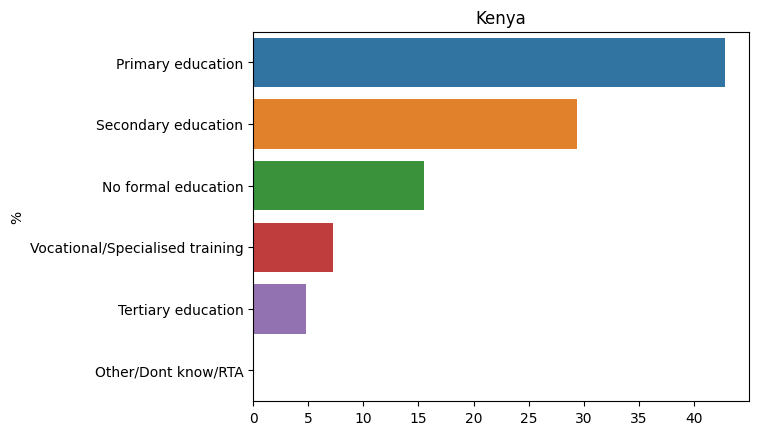

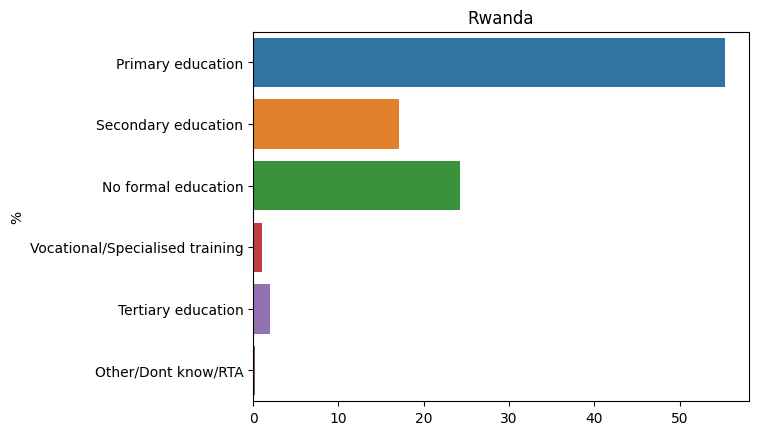

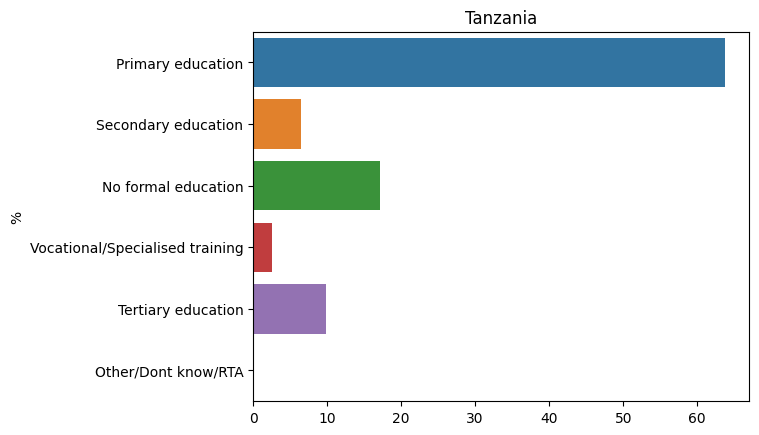

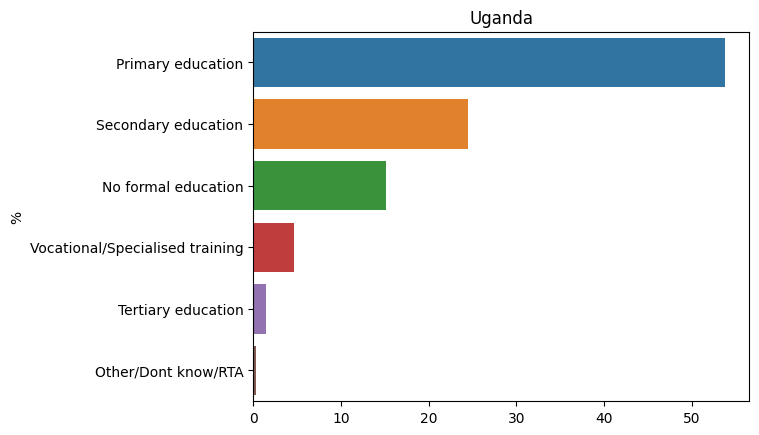

In [56]:
for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').education_level.value_counts(normalize=True)[edc_lst].index, 
                x = df.query('country == @countr').education_level.value_counts(normalize=True)[edc_lst].values * 100
                )
        g.set(title = countr,
              xlabel = '',
              ylabel = '%')

        plt.show();

for countr in country_list:
        plt.barh(df.query('country == @countr').education_level.value_counts(normalize=True).index, 
                df.query('country == @countr').education_level.value_counts(normalize=True).values,
                #labels = df.query('country == @countr').education_level.value_counts(normalize= True).index.tolist(),
                #colors = colors,
                #autopct='%1.1f%%'
                )
        plt.suptitle(countr)
        plt.show()

Job Type per Country

In [ ]:
# test 
df.groupby('country').job_type.value_counts(normalize= True)

In [58]:
# get the education level as list (sorted by value)
job_lst = df.query('country == "Kenya"').job_type.value_counts(normalize= True).index.tolist()

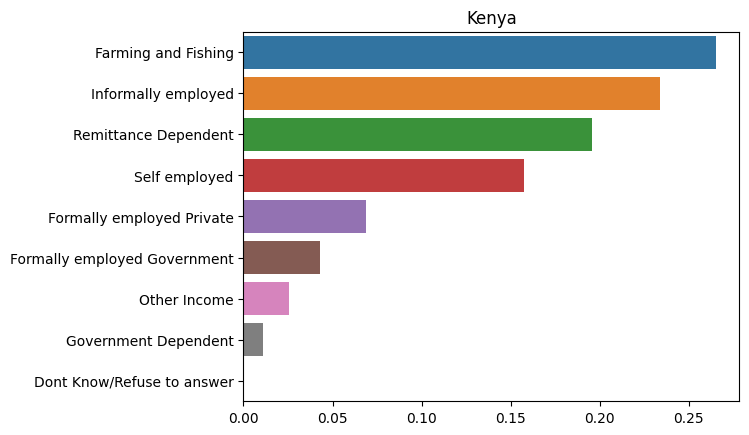

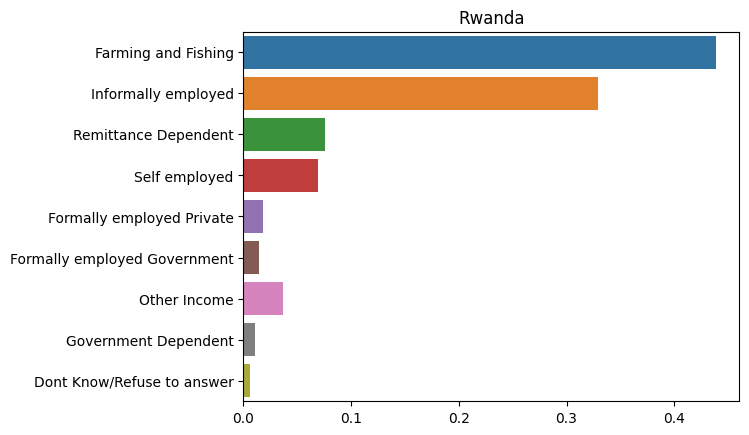

KeyError: "['Farming and Fishing', 'Formally employed Government', 'Dont Know/Refuse to answer'] not in index"

In [59]:
for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].index, 
                x = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].values
                )
        g.set(title = countr,
              ylabel = '')

        plt.show();

die Job-Typen sind nicht in allen Ländern gleich. Das macht es schwierig sie in gleicher Weise dazustellen.   
Ich werde es auf eine andere Weise versuchen:

In [102]:
location_dummies = pd.get_dummies(df.job_type, prefix='job')
location_dummies.columns = location_dummies.columns.str.replace(' ','_')
location_dummies.columns = location_dummies.columns.str.replace('/','_or_')
location_dummies.columns = location_dummies.columns.str.lower()
# change bool to int
location_dummies[location_dummies.columns.to_list()] = location_dummies[location_dummies.columns.to_list()].astype(int)
location_dummies.head(10)

,job_dont_know_or_refuse_to_answer,job_farming_and_fishing,job_formally_employed_government,job_formally_employed_private,job_government_dependent,job_informally_employed,job_no_income,job_other_income,job_remittance_dependent,job_self_employed
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0


In [103]:
location_dummies.sum()

job_dont_know_or_refuse_to_answer     126
job_farming_and_fishing              5441
job_formally_employed_government      387
job_formally_employed_private        1055
job_government_dependent              247
job_informally_employed              5597
job_no_income                         627
job_other_income                     1080
job_remittance_dependent             2527
job_self_employed                    6437
dtype: int64

In [112]:
#loaction_df = location_dummies.join(df['country'])
#loaction_df.head() 
#loaction_df.groupby('country').sum()

location_sum = location_dummies.join(df['country']).groupby('country').sum()
location_sum = location_sum.transpose()
location_sum

country,Kenya,Rwanda,Tanzania,Uganda
job_dont_know_or_refuse_to_answer,3,56,0,67
job_farming_and_fishing,1609,3832,0,0
job_formally_employed_government,260,127,0,0
job_formally_employed_private,416,161,370,108
job_government_dependent,65,91,84,7
job_informally_employed,1419,2878,1300,0
job_no_income,0,0,380,247
job_other_income,154,323,35,568
job_remittance_dependent,1188,662,677,0
job_self_employed,954,605,3774,1104


Now I have a table with the number ob jobstype per country.

In [121]:
location_sum.index

Index(['job_dont_know_or_refuse_to_answer', 'job_farming_and_fishing',
       'job_formally_employed_government', 'job_formally_employed_private',
       'job_government_dependent', 'job_informally_employed', 'job_no_income',
       'job_other_income', 'job_remittance_dependent', 'job_self_employed'],
      dtype='object')

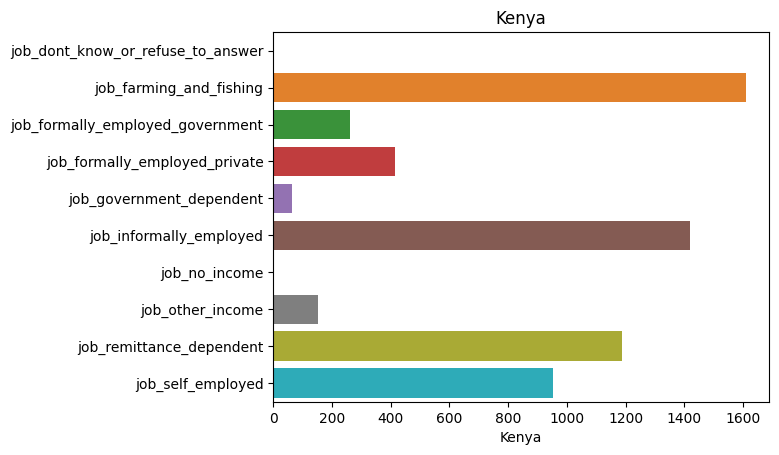

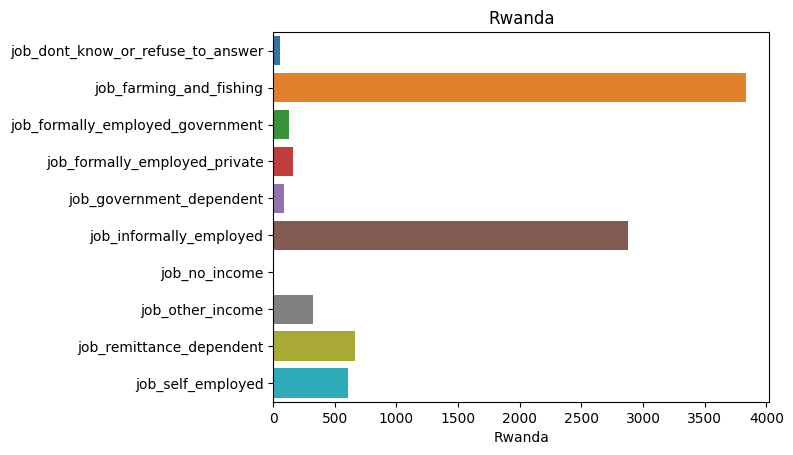

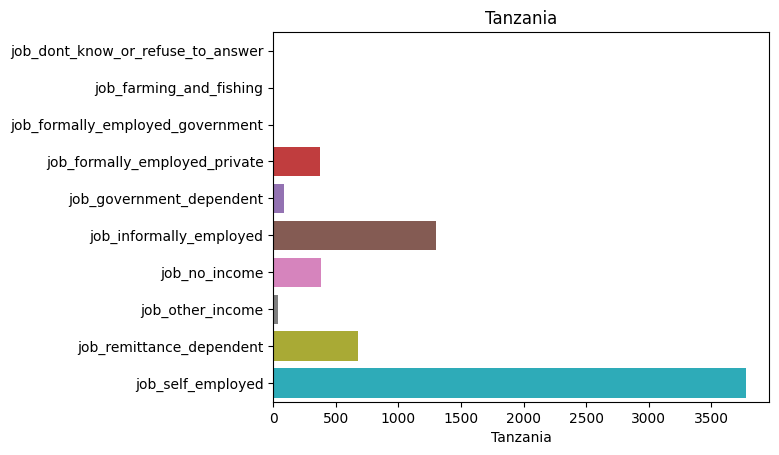

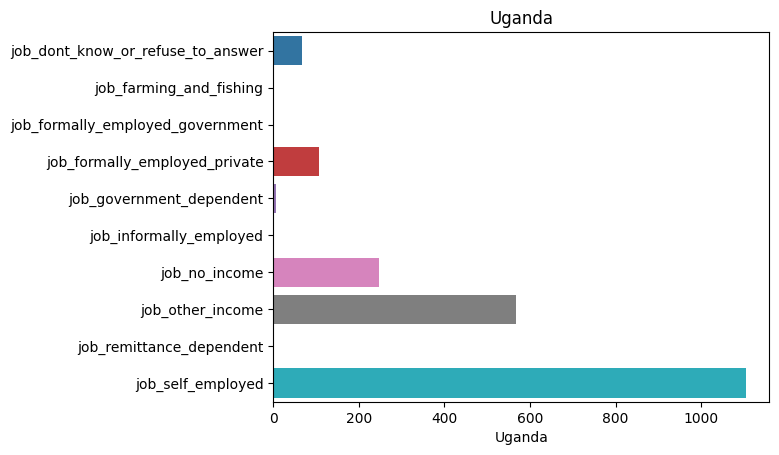

In [146]:

for countr in country_list:
        g=sns.barplot(y = location_sum.index, 
                x = location_sum[countr]
                )
        g.set(title = countr,
              ylabel = '')

        plt.show();

In [ ]:
for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].index, 
                x = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].values
                )
        g.set(title = countr,
              ylabel = '')

        plt.show();

## Location Type

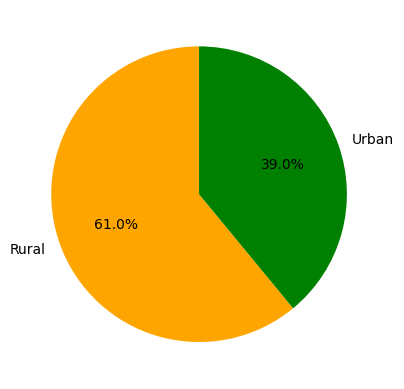

In [ ]:

plt.pie(df.location_type.value_counts(normalize=True),
                labels = ['Rural', 'Urban'],
                colors = ['orange', 'green'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
plt.show()

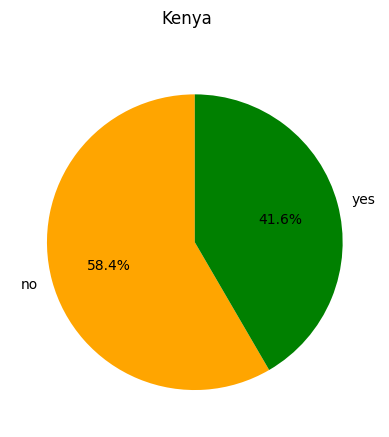

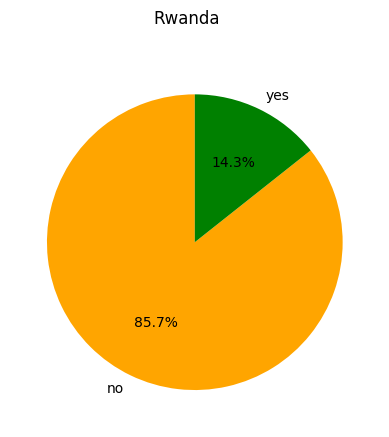

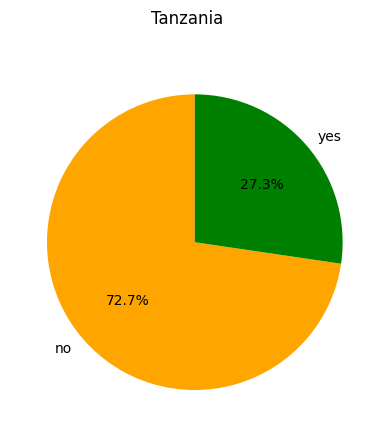

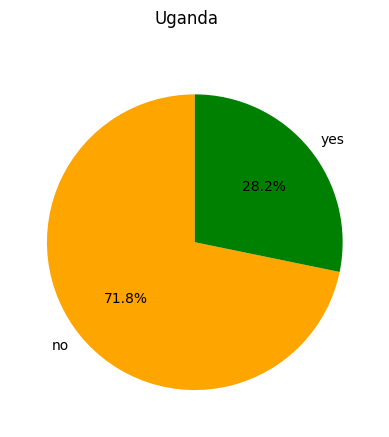

In [ ]:
colors = sns.color_palette('tab10')
for countr in country_list:
        plt.pie(df.query('country == @countr').location_type.value_counts(normalize=True),
                labels = ['no', 'yes'],
                colors = ['orange', 'green'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
        plt.suptitle(countr)
        picname = 'plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

In [ ]:
colors = sns.color_palette('tab10')
for countr in country_list:
        plt.pie(df.query('country == @countr').location_type.value_counts(normalize=True),
                #labels = ['no', 'yes'],
                colors = ['orange', 'green'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
        plt.suptitle(countr)
        picname = 'plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

## Household Size

In [125]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [128]:
df.household_size.describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [143]:
#df.groupby('household_size').household_size.count()

In [142]:
#df.query('bank_account == "Yes"').groupby('household_size').household_size.count()

In [158]:
household_join = pd.concat([df.groupby('household_size').household_size.count(),
                            df.query('bank_account == "Yes"').groupby('household_size').household_size.count()],
                            axis=1)
household_join.fillna(0, inplace=True)
household_join

,household_size,household_size
household_size,,
1,3057,584.0
2,5229,619.0
3,3920,559.0
4,3474,501.0
5,2853,427.0
6,2096,277.0
7,1400,177.0
8,751,86.0
9,363,37.0


In [177]:
#household_join.iloc[:,0]/household_join.iloc[:,1]

In [169]:
household_join['account_rate'] = (household_join.iloc[:,1]/household_join.iloc[:,0])*100
household_join

,household_size,household_size,account_rate
household_size,,,
1,3057,584.0,19.103696
2,5229,619.0,11.837828
3,3920,559.0,14.260204
4,3474,501.0,14.421416
5,2853,427.0,14.966702
6,2096,277.0,13.215649
7,1400,177.0,12.642857
8,751,86.0,11.451398
9,363,37.0,10.192837


<Axes: xlabel='household_size', ylabel='account_rate'>

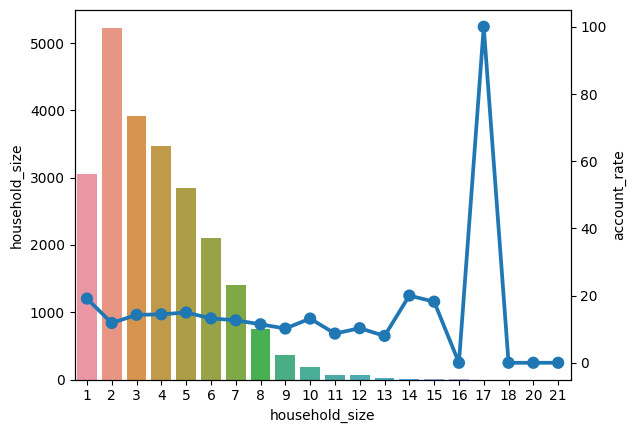

In [173]:
ax1 = sns.barplot(data = household_join,
             x = household_join.index,
             y = household_join.iloc[:,0])
ax2 = ax1.twinx()
sns.pointplot(data = household_join,
             x = household_join.index,
             y = 'account_rate')

The same now for Age of respondent

In [175]:
df.age_of_respondent.describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

In [176]:
age_join = pd.concat([df.groupby('age_of_respondent').age_of_respondent.count(),
                            df.query('bank_account == "Yes"').groupby('age_of_respondent').age_of_respondent.count()],
                            axis=1)
age_join.fillna(0, inplace=True)
age_join

,age_of_respondent,age_of_respondent
age_of_respondent,,
16,462,5.0
17,477,10.0
18,585,21.0
19,470,28.0
20,626,36.0
...,...,...
96,3,0.0
97,1,0.0
98,6,0.0


In [178]:
age_join['account_rate'] = (age_join.iloc[:,1]/age_join.iloc[:,0])*100
age_join

,age_of_respondent,age_of_respondent,account_rate
age_of_respondent,,,
16,462,5.0,1.082251
17,477,10.0,2.096436
18,585,21.0,3.589744
19,470,28.0,5.957447
20,626,36.0,5.750799
...,...,...,...
96,3,0.0,0.000000
97,1,0.0,0.000000
98,6,0.0,0.000000


/Users/maritaschmidt/NEUE_FISCHE/ML_proj_Feb_2024/.venv/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.121568627450980

<Axes: xlabel='age_of_respondent', ylabel='account_rate'>

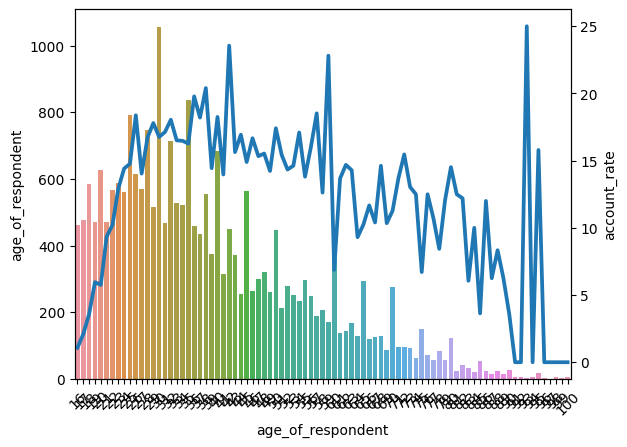

In [183]:
ax1 = sns.barplot(data = age_join,
             x = age_join.index,
             y = age_join.iloc[:,0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
ax2 = ax1.twinx()
sns.pointplot(data = age_join,
             x = age_join.index,
             y = 'account_rate',
             markers='')